# <center> Flight Fare Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Train set

In [2]:
train_data=pd.read_excel(r"F:\IMARTICUS\python data sets\flight_fare_Train_set.xlsx")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [7]:
# price is the dependent feature and rest of the  independent feature

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dropna(inplace=True)      #drop NULL value

# EDA

In [11]:
train_data['journey_day']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%M/%Y").dt.day


In [12]:
train_data["journey_month"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
#since we have converted Date_of_Journey column into integers , now ew can drop as it is of no use.
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [15]:
#Departure time is when a plane leaves the gate
#similar to Date_of_Journey we can extract values from Dep_Time

#Extracting Hours
train_data['Dep_hour']=pd.to_datetime(train_data["Dep_Time"]).dt.hour

#Extracting Minutes
train_data['Dep_min']=pd.to_datetime(train_data["Dep_Time"]).dt.minute

#now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
#Arrival_Time is when the plane pulls up to the gate.
#similar to Date_Of_Journey we can extract values from Arrival_Time

#Extracting Hours 
train_data["Arrival_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour

#Extracting Minutes
train_data["Arrival_Minute"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

#now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
#Time taken by plane to reach destination is called Duration
#It is the difference between Departure Time and Arrival time

#Assigning and Converting Duration Column into List
duration=list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # check if Duration contain only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"   #Adds 0 minute
        else:
            duration[i]="0h " + duration[i]          #Adds 0 hour
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep= "h")[0])) #Extract hours from Duration 
    duration_mins.append(int(duration[i].split(sep= "m")[0].split()[-1]))  #Extracts only minute from Duration

In [20]:
#Adding duration_hours and duration_mins list of train_data dataframe
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [22]:
train_data.drop(["Duration"],axis=1,inplace=True)

## Handling Categorical Data

In [23]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

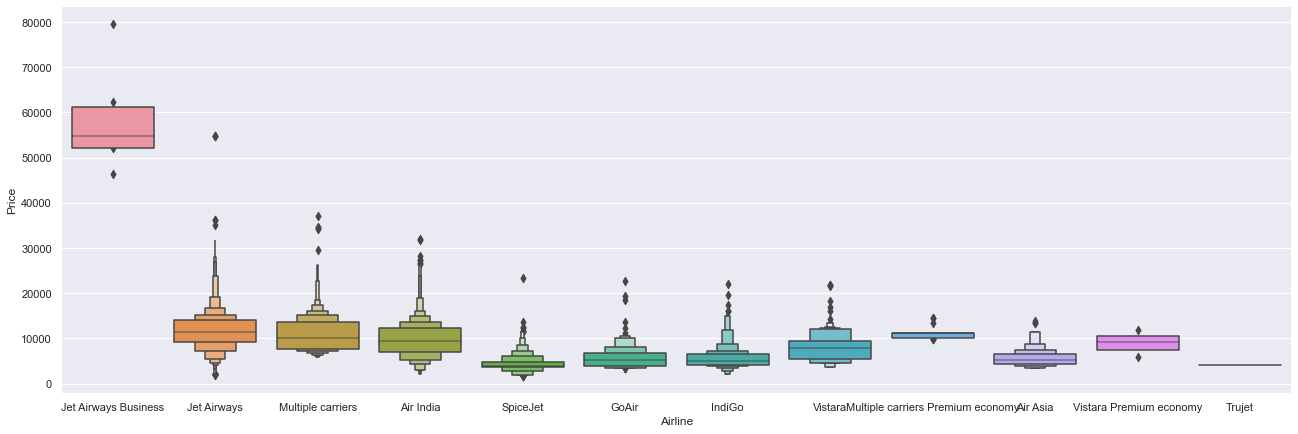

In [24]:
#from graph we can see that jet Airways Business have the highsest price
#Apart from the first Airline almost all are having similar median

#Airline vs price
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

#### conclusion=In graph we have to see that jet Airways Business have the highsest price

In [25]:
#As Airline is nominal categorical data we will perform OneHotEncoder
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)    #get_dummies is to do OneHotEncoding
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

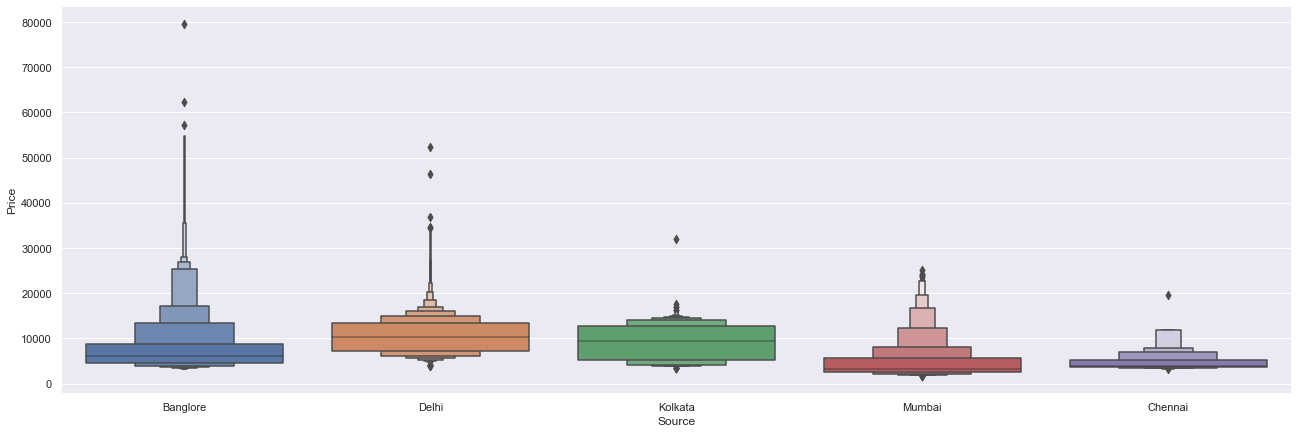

In [27]:
#source vs price
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

#### conclusion= Some of the outliers present in the Banglore and Delhi also have a some outliers

In [28]:
#As Source is nominal categorical data we will perform OneHotEncoding
Source=train_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
#As Destination is nominal categorical data we will perform OneHotEncoding
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [31]:
train_data["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → AMD → DEL       1
BOM → VNS → DEL → HYD             1
BOM → BLR → CCU → BBI → HYD       1
BLR → BOM → IXC → DEL             1
BLR → HBX → BOM → NAG → DEL       1
Name: Route, Length: 128, dtype: int64

In [32]:
#Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [33]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [34]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
#As this is case of ordinal categorical type we perform LabelEncoder
#Here Values are assigned with corresponding keys
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [36]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [37]:
#Concatenate dataframe ----> train_data +Airline + Source + Destination
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)  #create new feature data_train

In [38]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
#Drop the fetures
data_train.drop (["Airline","Source","Destination"],axis=1,inplace=True)

In [40]:
data_train.head()       #this data after the doing  preprocessing

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
data_train.shape

(10682, 30)

In [42]:
print("____"*30)

________________________________________________________________________________________________________________________


# Test set

In [43]:
test_data=pd.read_excel(r"F:\IMARTICUS\python data sets\flight_fare_Test_set.xlsx")

In [44]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## preprocessing

In [45]:
print(test_data.shape)    #see the shape of the test data
print("__"*20)
print(test_data.info())   #see the info of the test data
print("__"*20)
print(test_data.isna().sum())    #see the sum of null of the test data
print("__"*20)
print(test_data.dropna(inplace=True))   #drop the null in the data
print('__'*20)


(2671, 10)
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 104.4+ KB
None
________________________________________
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dt

In [46]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# EDA

In [47]:
test_data['journey_day']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%M/%Y").dt.day
test_data["journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [48]:
#since we have converted Date_of_Journey column into integers , now ew can drop as it is of no use.
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [49]:
#Departure time is when a plane leaves the gate
#similar to Date_of_Journey we can extract values from Dep_Time

#Extracting Hours
test_data['Dep_hour']=pd.to_datetime(test_data["Dep_Time"]).dt.hour

#Extracting Minutes
test_data['Dep_min']=pd.to_datetime(test_data["Dep_Time"]).dt.minute

#now we can drop Dep_Time as it is of no use
test_data.drop(["Dep_Time"],axis=1,inplace=True)

In [50]:
#Arrival_Time is when the plane pulls up to the gate.
#similar to Date_Of_Journey we can extract values from Arrival_Time

#Extracting Hours 
test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour

#Extracting Minutes
test_data["Arrival_Minute"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute

#now we can drop Arrival_Time as it is of no use
test_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [51]:
#Time taken by plane to reach destination is called Duration
#It is the difference between Departure Time and Arrival time

#Assigning and Converting Duration Column into List
duration=list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # check if Duration contain only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"   #Adds 0 minute
        else:
            duration[i]="0h " + duration[i]          #Adds 0 hour
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep= "h")[0])) #Extract hours from Duration 
    duration_mins.append(int(duration[i].split(sep= "m")[0].split()[-1]))  #Extracts only minute from Duration

In [52]:
#Adding duration_hours and duration_mins list of train_data dataframe
test_data["Duration_hours"]=duration_hours
test_data["Duration_mins"]=duration_mins

In [53]:
test_data.drop(["Duration"],axis=1,inplace=True)

# Handling Categorical Data

In [54]:
test_data["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [55]:
#As Airline is nominal categorical data we will perform OneHotEncoder
Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)    #get_dummies is to do OneHotEncoding
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [56]:
test_data["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [57]:
#As Destination is nominal categorical data we will perform OneHotEncoding
Destination=test_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [58]:
test_data["Route"].value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
CCU → AMD → BLR                  1
BLR → BOM → IDR → DEL            1
CCU → DEL → COK → TRV → BLR      1
CCU → BBI → IXR → DEL → BLR      1
BLR → BOM → UDR → DEL            1
Name: Route, Length: 100, dtype: int64

In [59]:
#Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other
test_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [60]:
test_data["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [61]:
#As this is case of ordinal categorical type we perform LabelEncoder
#Here Values are assigned with corresponding keys
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [62]:
#Concatenate dataframe ----> train_data +Airline + Source + Destination
data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)  #create new feature data_test

In [63]:
#Drop the fetures
data_test.drop (["Airline","Source","Destination"],axis=1,inplace=True)

In [64]:
data_test.head()       #this data after the doing  preprocessing

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1.0,0.0,0.0,0.0,0.0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,1.0,0.0,0.0,0.0,0.0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,0.0


In [65]:
data_test.shape

(10682, 28)

## Feature Selection

In [67]:
data_train.shape

(10682, 30)

In [70]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_Minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [72]:
x=data_train.loc[:,['Total_Stops',  'journey_day', 'journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_Minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

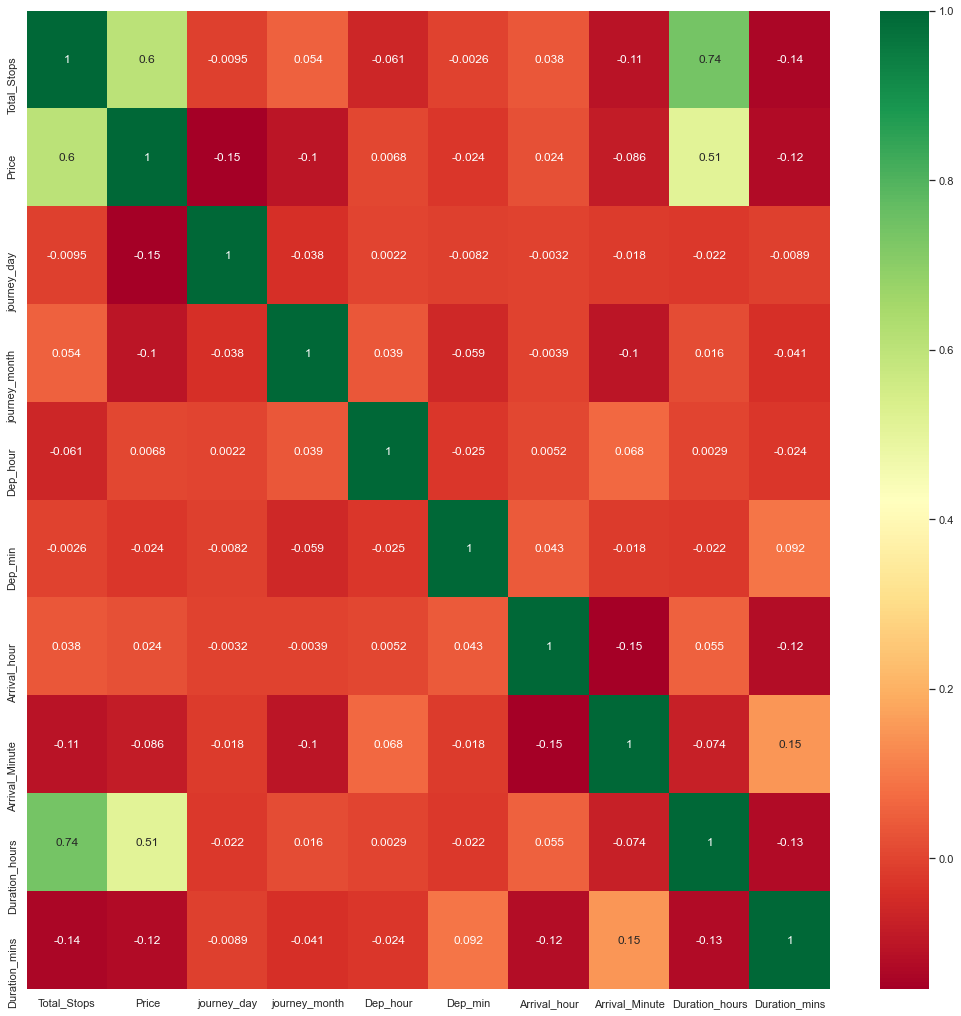

In [78]:
#finds correlation between independent and dependent attribute
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [79]:
#important feature using ExtraTreeRegressro
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [80]:
print(selection.feature_importances_)

[2.57782849e-01 1.44597880e-01 5.32795088e-02 2.39786174e-02
 2.13361855e-02 2.78282304e-02 1.96226570e-02 9.51557755e-02
 1.77526002e-02 1.12271845e-02 1.58249769e-03 1.65129082e-02
 1.35927528e-01 6.69503367e-02 1.91147316e-02 8.99926884e-04
 2.96312122e-03 9.76500892e-05 5.57846137e-03 9.57485319e-05
 4.64678826e-04 1.41236848e-02 3.23013936e-03 6.79666712e-03
 9.56097351e-03 1.25213919e-02 5.99412462e-03 4.21067076e-04
 2.46028741e-02]


<function matplotlib.pyplot.show(close=None, block=None)>

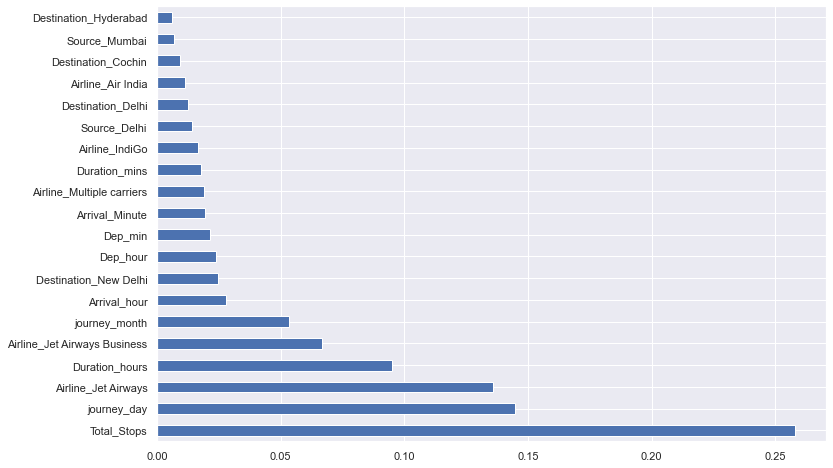

In [82]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show

#### conclusion=Total_Stops are  most important feature

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [84]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [85]:
y_pred=reg_rf.predict(x_test)

In [86]:
reg_rf.score(x_train,y_train)

0.9550677750177867

In [87]:
reg_rf.score(x_test,y_test)

0.7772407069119631

C:\Users\sarvadnya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


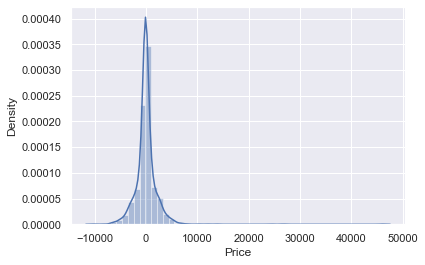

In [88]:
sns.distplot(y_test-y_pred)
plt.show()

#### conclusion=It's performing a gaussian distribution that means results are very good .

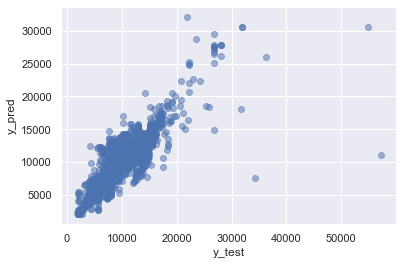

In [89]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### conclusion=scatter plot the data are plot  in incresing manners

In [90]:
from sklearn import metrics

In [91]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1193.6170476619257
MSE: 4954860.384164393
RMSE: 2225.951568243207


In [92]:
metrics.r2_score(y_test,y_pred)

0.7772407069119631

# Hyperparameter tuning

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
#Randomized search CV
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#number of features to consider at every split
max_feature=['auto','sqrt']
#maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#minimum number of samples requried at each leaf node
min_sample_leaf=[1,2,5,10]

In [103]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,
             'max_features' : max_feature,
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split,
             'min_samples_leaf' : min_sample_leaf}

In [105]:
#Random search of parameters using 5 fold cross validation
#search across 100 different combination
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [106]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  11.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [107]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [108]:
prediction=rf_random.predict(x_test)

C:\Users\sarvadnya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

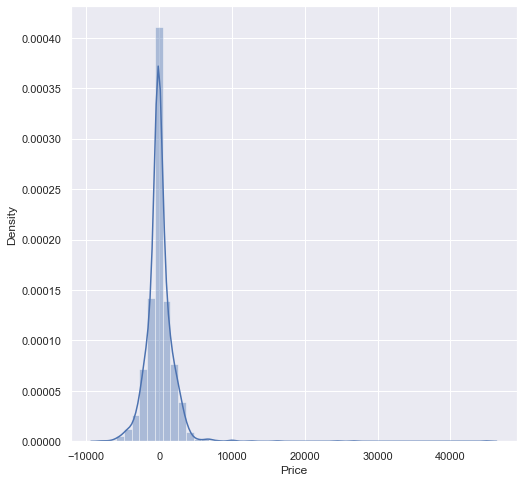

In [109]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show

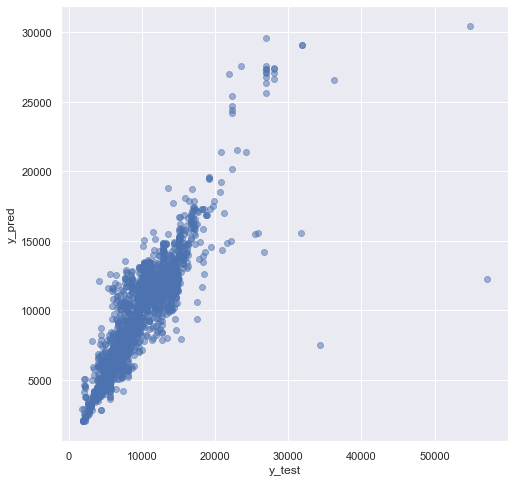

In [110]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [111]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1175.640475661064
MSE: 4494749.680755226
RMSE: 2120.0824702721416


## Save the model to reuse it again

In [112]:
import pickle
#open a file , where you want to store the data
file=open('flight_rf.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)

In [113]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [114]:
y_prediction=forest.predict(x_test)

In [115]:
metrics.r2_score(y_test,y_prediction)

0.7979262413341304